In [1]:
import pandas as pd

pd.set_option('display.max_columns', 25)
df = pd.read_csv("../Data/bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df['y'] = df['y'].apply(lambda x: 0 if x == "no" else 1)
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_mat)
plt.show()

<Figure size 1400x800 with 2 Axes>

In [6]:
print("Total converted:", df['y'].sum(), len(df))
print("Total conversion rate: %", (df['y'].sum() / len(df) * 100.0).round(2))

Total converted: 4640 41188
Total conversion rate: % 11.27


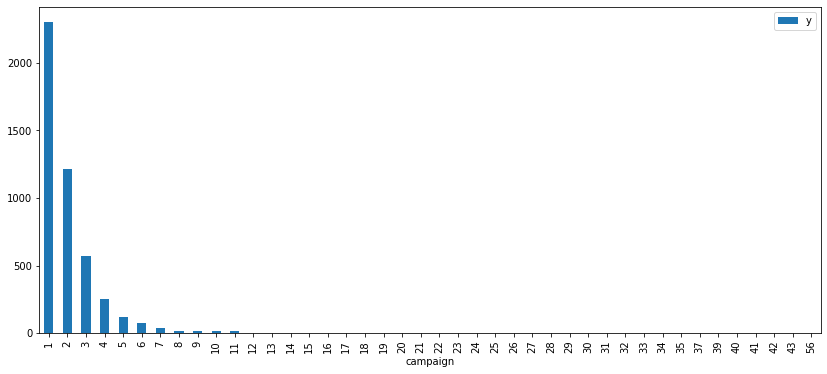

In [7]:
contacts_y = df.groupby('campaign')['y'].sum().to_frame().reset_index()
contacts_y.plot.bar(x='campaign', y='y', figsize=(14, 6))
plt.show()

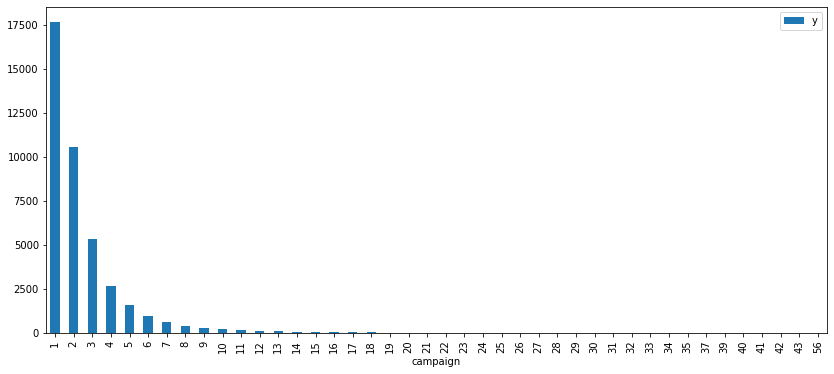

In [8]:
customers_y = df.groupby('campaign')['y'].count().to_frame().reset_index()
customers_y.plot.bar(x='campaign', y='y', figsize=(14, 6))
plt.show()

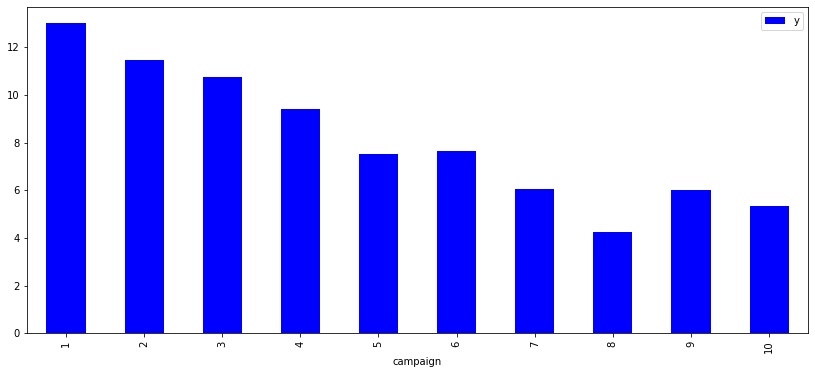

In [9]:
conversion_y = (df.groupby('campaign')['y'].sum() / df.groupby('campaign')['y'].count() * 100.0).to_frame().reset_index()
conversion_y.head(10).plot.bar(x='campaign', y='y', figsize=(14, 6), colormap="winter")
plt.show()

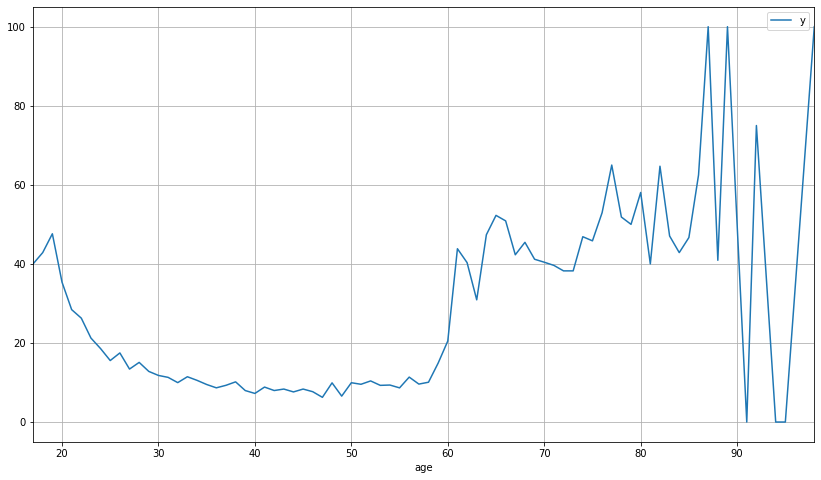

In [10]:
conv_age = (df.groupby('age')['y'].sum() / df.groupby('age')['y'].count() * 100.0).to_frame()
conv_age.plot(figsize=(14, 8), grid=True)
plt.show()

In [11]:
df['age'] = df['age'].apply(lambda x: '[17, 25)' if x < 25 else '[25, 35)' 
                                                      if x < 35 else '[35, 45)'
                                                      if x < 45 else '[45, 55)' 
                                                      if x < 55 else '[55, 65)'
                                                      if x < 65 else '65+')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"[55, 65)",housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"[55, 65)",services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"[35, 45)",services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"[35, 45)",admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"[55, 65)",services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


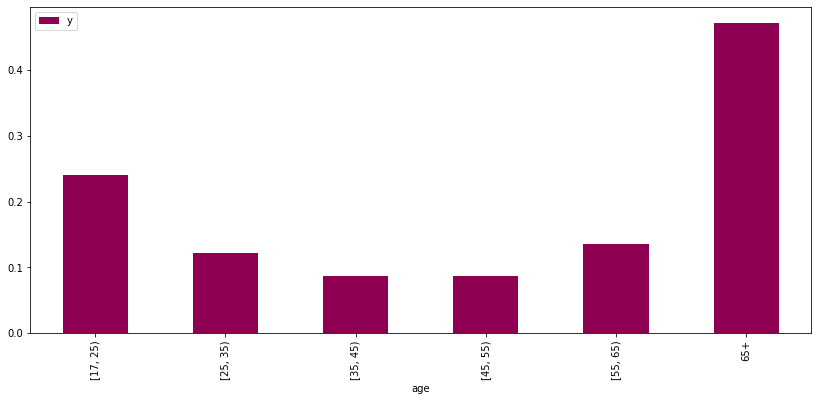

In [12]:
age_grp_conv = (df.groupby('age')['y'].sum() / df.groupby('age')['y'].count()).to_frame().reset_index()
age_grp_conv = age_grp_conv.reindex([1, 2, 3, 4, 5, 0])
age_grp_conv.plot.bar(x='age', y='y', figsize=(14, 6), colormap="PiYG")
plt.show()

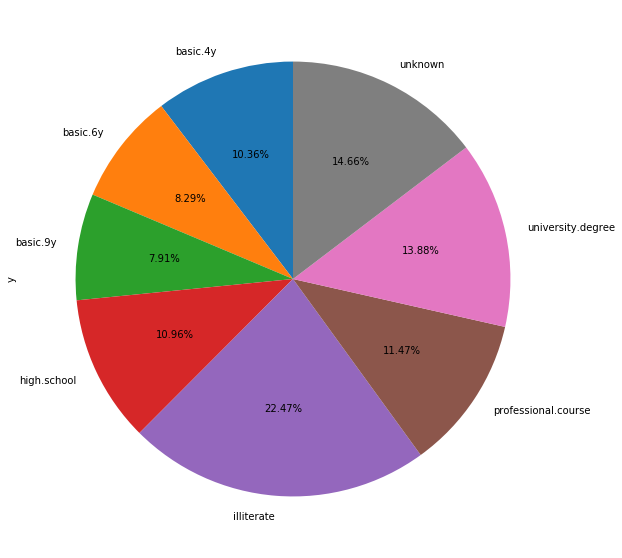

In [13]:
ed_conv = (df.groupby('education')['y'].sum() / df.groupby('education')['y'].count() * 100.0).to_frame()
ed_conv.plot.pie(y='y', figsize=(14, 10), startangle=90, autopct=lambda x: '%0.2f%%' % x, legend=False)
plt.show()

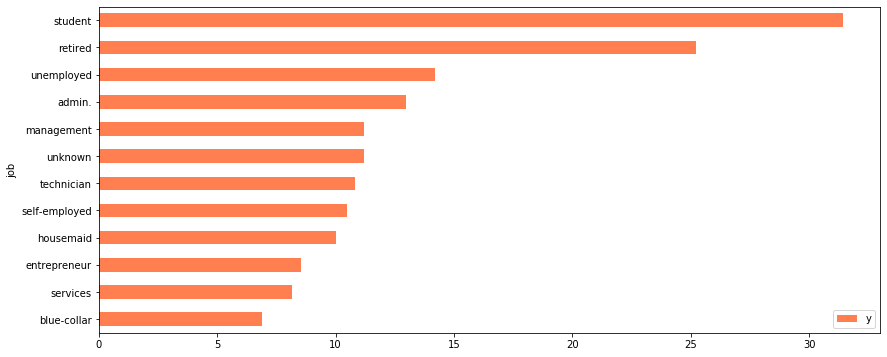

In [14]:
job_conv = (df.groupby('job')['y'].sum() / df.groupby('job')['y'].count() * 100.0).to_frame()
job_conv.sort_values('y', inplace=True)
job_conv.plot.barh(figsize=(14, 6), color='coral')
plt.show()

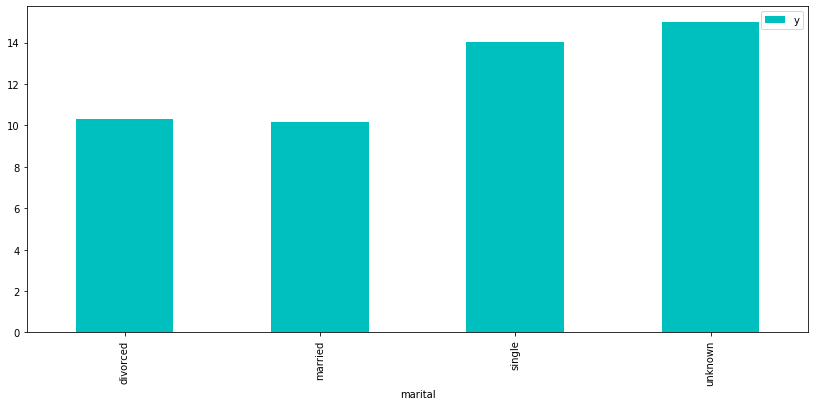

In [15]:
mar_conv = (df.groupby('marital')['y'].sum() / df.groupby('marital')['y'].count() * 100.0).to_frame()
mar_conv.plot.bar(figsize=(14, 6), color='c')
plt.show()